# k-Nearest Neighbors, Support Vector Machines, and Naive Bayes

## Agenda. 

- Overview Support Vector Machines.  
- Overview of K-NN.  
- Naive Bayes.  
- Comparison on SPAM with logistic regression, SVM, KNN, and naive bayes.    

## Resources
[Raschka's Naive Bayes Paper](https://arxiv.org/pdf/1410.5329.pdf)
<br>[SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html)
<br>[A Tutorial on Support Vector Machines for Pattern Recognition](https://www.microsoft.com/en-us/research/publication/a-tutorial-on-support-vector-machines-for-pattern-recognition/)


# Algorithms Discussed so Far
- Linear Regression  
- Lasso/Ridge Regression  
- Logistic Regression  
- Decision Trees  
- Random Forest

# Additional Foundational Supervised Learning Algorithms
- [Support Vector Machines](https://en.wikipedia.org/wiki/Support-vector_machine).  
- [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).  
- [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).  

[Support vector machines and k-nearest neighbors are overviewed in Machine Learning with Python 3rd Edition, Chapter 3.](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)  

# Support Vector Machines (SVM)

<img src='./diagrams/svm-margin.png' style="width: 500px">

[Image source: Python Machine Learning 3rd Edition, Figure 3.9](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/images/03_09.png)

So far for classification we have talked about:
- Logistic Regression. 
- Decision Trees.  
Both of those are models that produce linear or linear-hinge decision functions.
> Logistic regression is a linear model that learns coefficient weights and normalizes the output with a sigmoid (or softmax) function.  
<br><br>Decision trees learn rules that are effectively a series of if-else statements.

### Hyperplanes
- Assume a two-class classification problem with two predictors X1 and X2.  
- Assume the two classes are “linearly separable” i.e. one can draw a straight line in which all points on one side belong to the first class and points on the other side to the second class.    
- Then a natural approach is to find the straight line that gives the biggest separation between the classes i.e. the points are as far from the line as possible.  
- This is the basic idea of a support vector classifier.  

**What if we encountered a different type of data that is inherently non-linear?**

In [1]:
import sklearn
sklearn.__version__

'1.5.1'

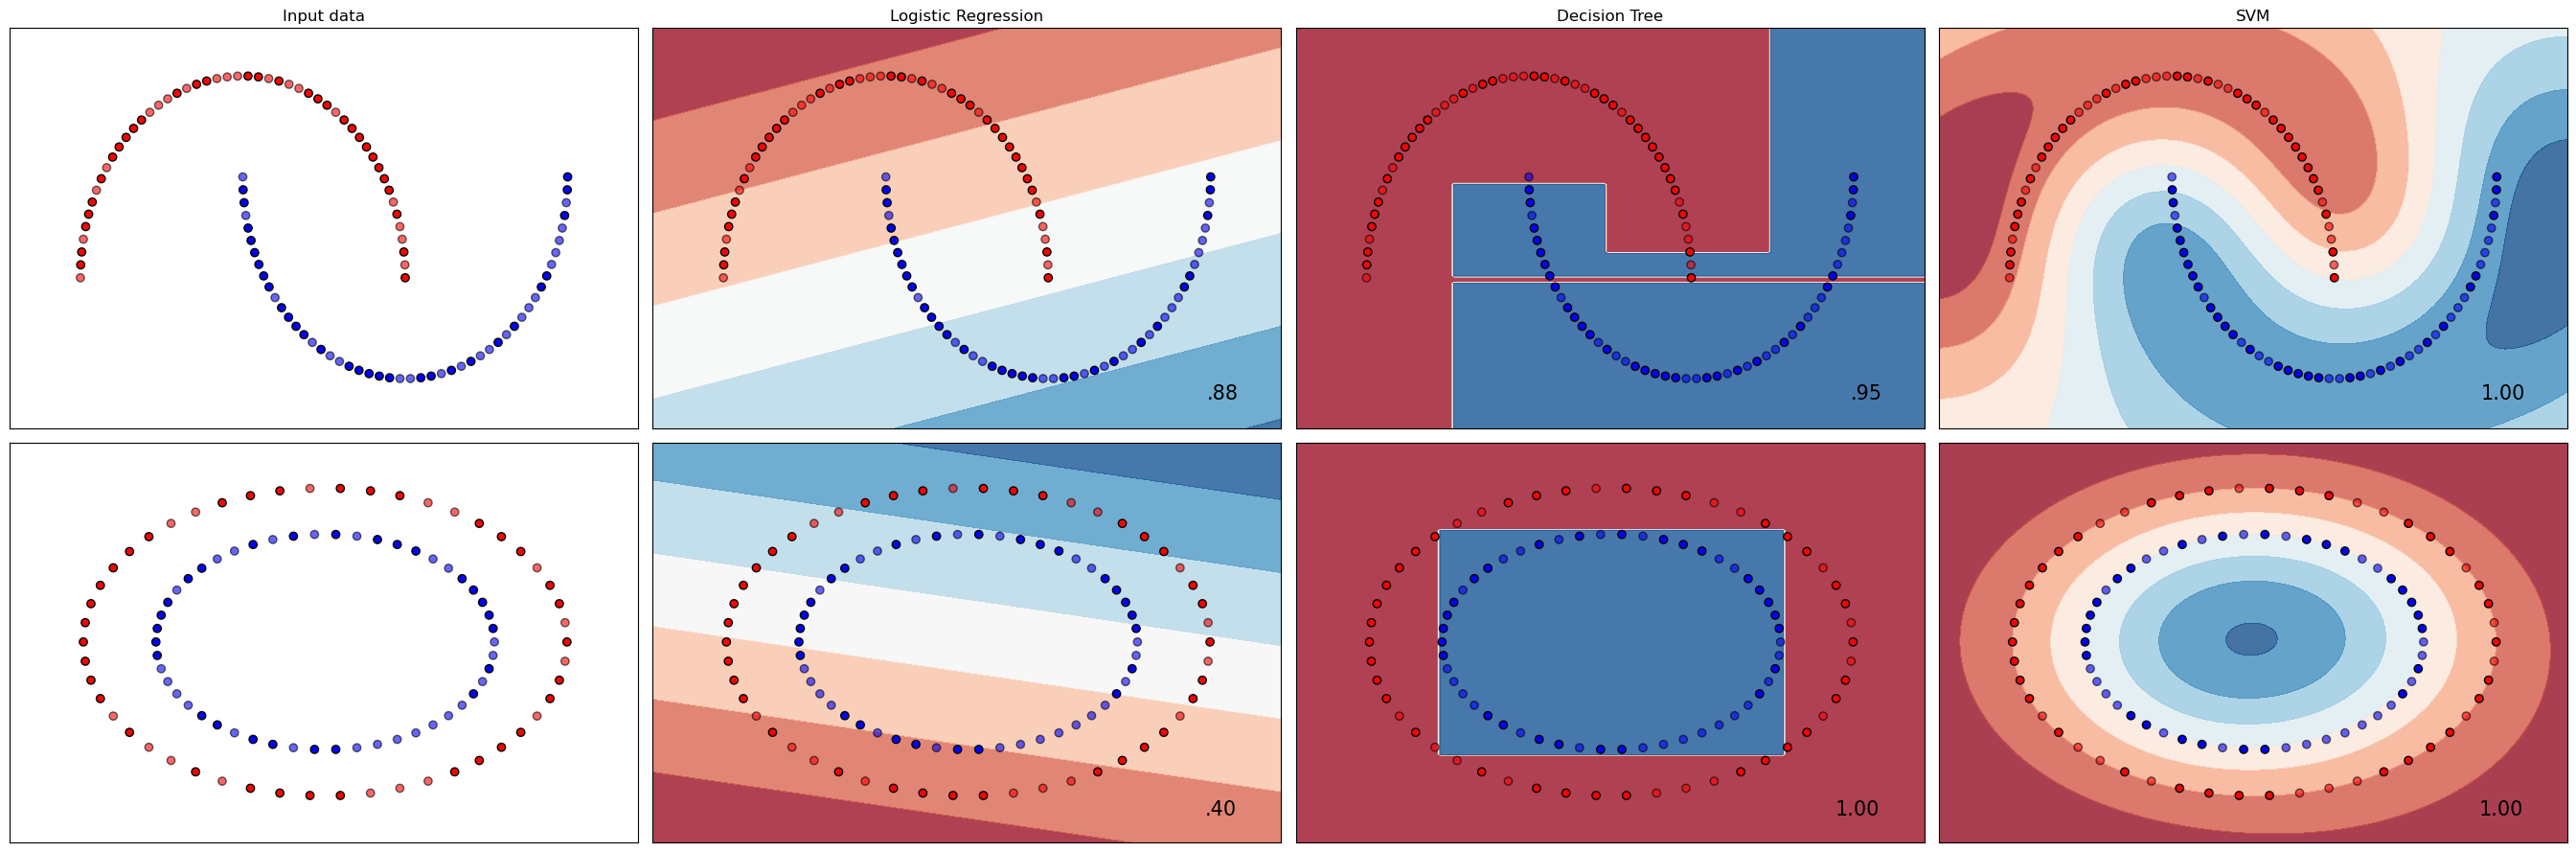

In [2]:
'''
Modified from: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["Logistic Regression", "Decision Tree", "SVM"]

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    SVC(kernel='rbf')
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1
                          )

datasets = [make_moons(noise=0, random_state=0),
            make_circles(noise=0, factor=0.7, random_state=1),
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## What is a SVM?
It views every feature in high-dimensional space. For the above example, that would be two-dimensional, but if your feature matrix had 10,000 features, it would see the world in a space with 10,000 dimensions.

It "draws" lines to create hyperplanes that attempt to maximize the separation or margin of the classes. You traditionally have to label the negative classes in $y$ as $-1$ and the positive classes as $1$.

It can be represented by: 
$$wx - b = 0$$  
$wx = w^{(1)}x^{(1)}+w^{(2)}x^{(2)}+\dots+w^{(D)}x^{(D)}$, where $D$ is the number of dimensions in the feature vector $x$.

And predicts the class with $y=sign(wx-b)$, where $y\in(-1,1)$

This is solved by optimizing these constraints:
$$
wx_{i}-b\geq+1 \space \text{if} \space y_{i}=+1
$$
$$
wx_{i}-b\leq-1 \space \text{if} \space y_{i}=-1
$$

We want it to separate the positive from the negatives by the largest margin, which is the decision boundary (see chart above). To determine the margin, we use `distance`. This is generally done with minimizing the Euclidean:
$$
||w||=\sqrt{\sum(w^{{j}})^2}
$$

We'll minimize $||w||$, with respect $y_{i}(wx_{i}-b)\geq+1$, which is shorthand for the above two constraints. The smaller the $||w||$, the larger the distance between the hyperplanes.

> The positive examples should fall on one side of the hyperplance and the negative examples should fall on the other.

The distance between hyperplanes is $\frac{2}{||w||}$, i.e., smaller $||w||$ is larger distance.

#### Hard vs. soft margin
The above assumes the two classes are completely linearly separated - which generally won't be the class in reality (hard margin).

> Practical implementation use a soft margin, which introduces a slack variable, $\epsilon$. This causes the objection function to become:

$$
\frac{2}{||w||}+C(\sum \epsilon^{i})
$$

$C$ is the way we can use regularization with SVMs.

<img src='./diagrams/svm-c.png' style='width: 500px'>

[Image source: Python Machine Learning 3rd Edition, Figure 3.10](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/images/03_10.png)

> Higher $C$ decreases the margin and smaller values increase the margin. Smaller $C$ creates a simpler model since the boundaries are much wider.

#### Compared to Logistic Regression
Logistic regression and linear SVMs are very similar and will generally more or less match each other's performance. Defer to logistic regression, since it is a simplier model in that case.  

### Kernel Trick
While SVMs are essentially linear models, we can use the kernel trick to make these models work well on non-linear data. Here we transform our space from two-dimensions to three-dimensions.

$$
\phi(x_1,x_2)=(z_1,z_2,z_3)=(x_1,x_2,x_{1}^{2},x_{2}^{2})
$$

Which is linearly separable:

<img src='./diagrams/svm-kernel.png' style='width: 500px'>

[Image source: Python Machine Learning 3rd Edition, Figure 3.13](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/images/03_13.png)

> $\phi$ is an arbitrary transformation function.

The most common is the radial basis function (which essentially a similarity function):

$$
k(x^{(i)},x^{(j)})=exp(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2})
$$

<div class="alert alert-block alert-warning"><b>Caution: </b> While powerful, these are VERY computationally intensive. Using on large datasets will be very expensive. </div>

#### More information on SVMs:
- [A Tutorial on Support Vector Machines for Pattern Recognition](https://www.microsoft.com/en-us/research/publication/a-tutorial-on-support-vector-machines-for-pattern-recognition/)  
- [scikit-learn Documentation](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

Some of the different kernels available:
<img src='./diagrams/svm-kernels.png' style='width: 500px'>

[Image source: scikit-learn](https://scikit-learn.org/stable/modules/svm.html#svm-classification)


### SVM Example versus Logistic Regression
[Compare performance on the digits dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
import pandas as pd 

pd.Series(digits.target).value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

> Almost perfectly balanced, multi-class dataset.

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

- Still need to split off the data for training and evaluation.

In [7]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

dX_train, dX_test, dy_train, dy_test = create_splits(digits.data, digits.target)

print(f'Training sample: {dX_train.shape[0]:,}')
print(f'Test sample: {dX_test.shape[0]:,}')

Training sample: 1,437
Test sample: 360


#### Logistic Regression
- We'll test using a few different regularization levels.  
- Labels are balanced, so accuracy is a reasonable choice for a metric.  

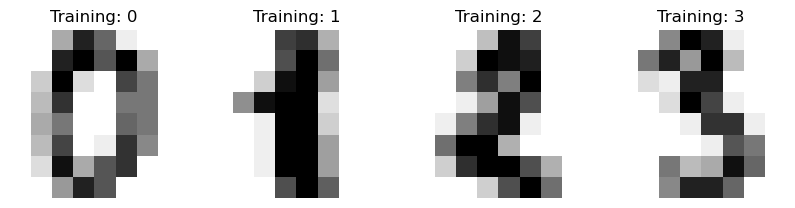

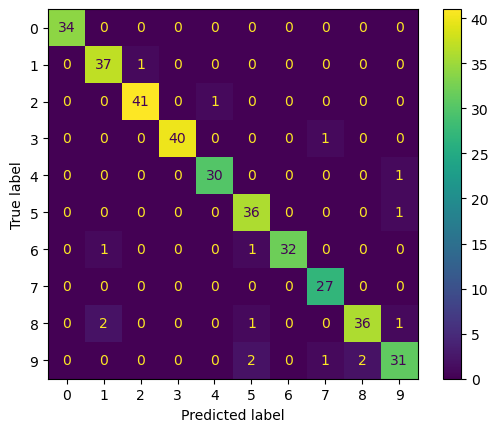

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

lg_reg = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', LogisticRegression(solver='liblinear'))])


param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100, 1000]}
 ]

lg_results = GridSearchCV(estimator=lg_reg, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
lg_results = lg_results.fit(dX_train, dy_train)

ConfusionMatrixDisplay.from_estimator(lg_results, dX_test, dy_test)
plt.show()

In [9]:
lg_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(C=1, solver='liblinear'))])

#### Support Vector Machine
We'll try using a few different regularization options and two different kernels.

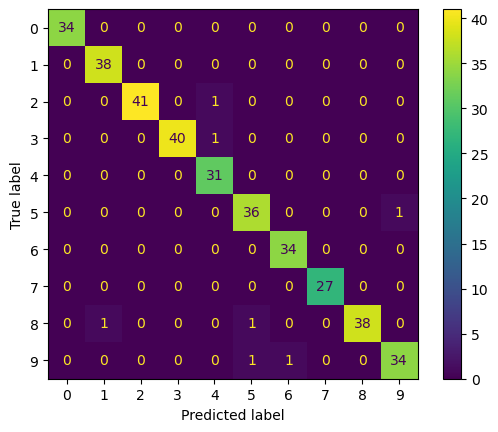

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', SVC())])


param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100, 1000], 'model__kernel': ['linear','rbf']}
 ]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(dX_train, dy_train)

ConfusionMatrixDisplay.from_estimator(svm_results, dX_test, dy_test)
plt.show()

In [11]:
svm_score = svm_results.score(dX_test, dy_test)
lreg_score = lg_results.score(dX_test, dy_test)

print(f'Logistic Regression Score: {lreg_score:.2%}')
print(f'Support Vector Machine Score: {svm_score:.2%}')

Logistic Regression Score: 95.56%
Support Vector Machine Score: 98.06%


> Marginally better performance with the Support Vector Machine, with the below hyperparameters:

In [12]:
svm_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('model', SVC(C=10))])

[Support vector machines also work with regression problems](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR), but you may come across computational issues with larger datasets.

> Support vector machines are commonly used for ranking problems, see [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html).

# k-Nearest Neighbors ([KNN](https://scikit-learn.org/stable/modules/neighbors.html#classification))
- It's a lazy algorithm. 
    - It doesn't want to learn anything.  
    - It just tries to memorize what's it has seen before.  
- It doesn't learn a decision function like logistic regression or SVM.  
- There are no weights.  
- There are no learned rules like in decision trees.  

> KNN literally holds all the data in memory and determines what which points are closest to the test data.


<div class="alert alert-block alert-warning"><b>Caution: </b> Since all the data will need to be loaded/reloaded into memory, this may not be recommended for larger datasets. </div>


> If you trained a 10gb dataset, the model will would to load the 10gb dataset for each scoring run!

### What's this is thing?
- Non-parametric model since there are no parameters that are being learned (e.g., no regression weights).  
- KNN is an instance-based learning model, since it memorizes the training data.  
- KNN is lazy since it doesn't have a cost function.  

### What is it doing?
- Choose the number of closest samples, $k$, to look at based on a distance matrix.  
- Find the k-nearest neighbors and assign the label based on the majority vote.  
- scikit-learn has options to use [search trees](https://dl.acm.org/doi/10.1145/361002.361007) to speed up the algorithm, otherwise, the brute force approach will calculate each potential distance between each pair of points, which explodes in computation as $N$ grows.

<img src='./diagrams/knn.png' style='width: 500px'>

[Image source: Python Machine Learning 3rd Edition, Figure 3.23](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03/images)


<div class="alert alert-block alert-success"><b>Benefit: </b> Immediately adapts as we get new training data. </div>


### Biggest Hyperparameters
- $k$
- Distance function

#### $k$
- Critical for determining balance between under and overfitting.  
- Smaller values of $k$ are more likely to lead to overfitting.  
- You'll need to search the space to determine the best $k$ to use.  

#### Distance 
- Used to determine how close the training samples are from the test examples.  
- Euclidean is a common choice:  

$$\sqrt{\sum((x - y)^2)}$$

- [Minkowski](https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/minkdist.htm) is also another common choice:  
$$
d(x^{(i)},x^{(j)})=^p\sqrt{\sum{|x_{k}^{(i)}-x_{k}^{(j)}}|^p}
$$

$p=2$ is the same as Euclidean and $p=1$ is the same as Manhattan.



<div class="alert alert-block alert-warning"><b>Curse of Dimensionality: </b> Very susceptible to overfitting. The closest neighbors may be too far away in high-dimensional space to be good candidates. </div>

- KNN doesn't have regularization, so you'll need to do feature selection and/or dimensionality reduction.  
- Like SVM, works for classification and regression.
- Regression can give you stairstep like results:  
<img src='./diagrams/knn-reg.png' stype='width: 500px'>

[Image source scikit-learn](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)

### KNN on the Digits Data

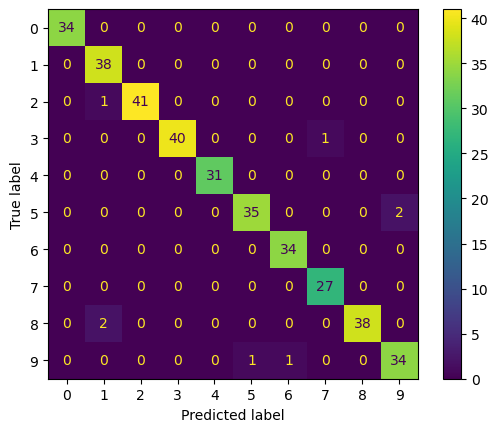

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

knn_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(dX_train, dy_train)

ConfusionMatrixDisplay.from_estimator(knn_results, dX_test, dy_test)
plt.show()

In [14]:
knn_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

In [15]:
svm_score = svm_results.score(dX_test, dy_test)
lreg_score = lg_results.score(dX_test, dy_test)
knn_score = knn_results.score(dX_test, dy_test)

print(f'Logistic Regression Score: {lreg_score:.2%}')
print(f'Support Vector Machine Score: {svm_score:.2%}')
print(f'k-Nearest Neighbor Score: {knn_score:.2%}')

Logistic Regression Score: 95.56%
Support Vector Machine Score: 98.06%
k-Nearest Neighbor Score: 97.78%


In [17]:
knn_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

# Naive Bayes
A popular classifer for text classification problems (e.g., spam detection). Raschka has a paper on the details,[Naive Bayes and Text Classification I - Introduction and Theory](https://arxiv.org/abs/1410.5329).

Based on Bayes Theorm:
$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}
$$

Where:
- A and B are events and $B\neq0$  
- A and B are independent events

"Naive" comes from the independent assumption because it is unrealistic and largely ignored in reality.  
- The stronger the independence violation the weaker the results (generally).


<div class="alert alert-block alert-warning"><b>Performance: </b> Generally compare well to other classifier in smaller datasets, but under-perform as $N$ grows. </div>

### Mechanics
Posterior Probability:
$$
P(w_j|x_i)=\frac{P(x_i|w_j)P(w_j)}{P(x_i)}
$$

Predicted Label = $argmax(P(w_j|x_i)$, e.g., person has diabetes if $P(diabetes|x)\geq P(no \space diabetes|x)$

More generally:
$$
P(x|w_j)=\prod P(x_k|w_j)
$$

For categorical data, this resolves to frequency counts:
$$
\hat{P}(x_i,w_i)=\frac{N_{x_i,w_i}}{N_{w_j}}
$$

Where $N_{x_i,w_i}=$ the number of times $x_i$ appears and $N_{w_j}=$ the total counts.


> Negative numbers: Because of the above, number numbers aren't allowed in the feature matrix.

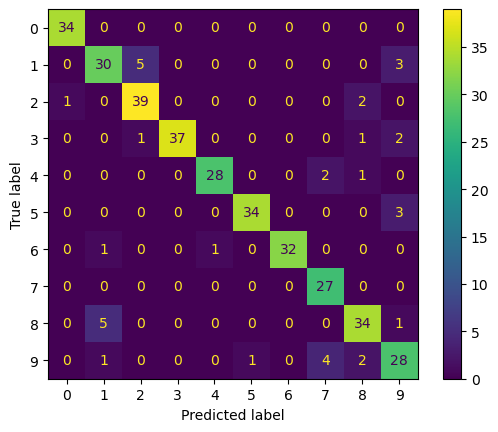

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

nb_m = modeling_pipeline = Pipeline([('model', MultinomialNB())])


param_grid = [
  {'model__alpha': [0.1, 1]}
 ]

nb_results = GridSearchCV(estimator=nb_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
nb_results = nb_results.fit(dX_train, dy_train)

ConfusionMatrixDisplay.from_estimator(nb_results, dX_test, dy_test)
plt.show()

In [19]:
svm_score = svm_results.score(dX_test, dy_test)
lreg_score = lg_results.score(dX_test, dy_test)
knn_score = knn_results.score(dX_test, dy_test)
nb_score = nb_results.score(dX_test, dy_test)

print(f'Logistic Regression Score: {lreg_score:.2%}')
print(f'Support Vector Machine Score: {svm_score:.2%}')
print(f'k-Nearest Neighbor Score: {knn_score:.2%}')
print(f'Naive Bayes Score: {nb_score:.2%}')

Logistic Regression Score: 95.56%
Support Vector Machine Score: 98.06%
k-Nearest Neighbor Score: 97.78%
Naive Bayes Score: 89.72%


> Naive Bayes had the worst performance on the digits. Required different processing since it can't handle negative values.

# What about another example?
### Spam Detection

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/week3/spam.csv', encoding='latin-1')
df = df.iloc[:, :2]
df.columns = ['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


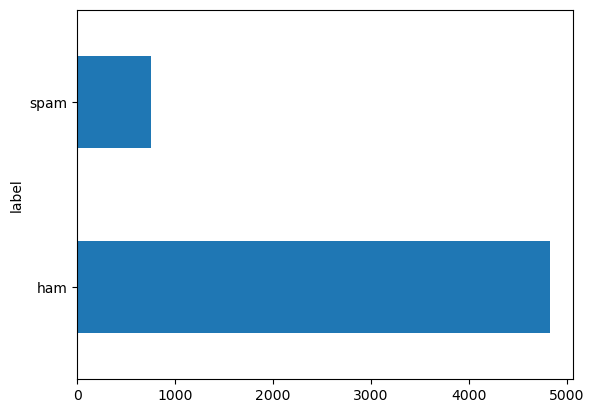

In [21]:
df.label.value_counts().plot.barh()
plt.show()

> Unbalanced dataset, so we could consider a couple of things:
- Look at either recall, precision, or F1.  
- Look at weighting the classes.  

#### Split into training and test

In [22]:
lab = np.where(df['label'] == 'spam', 1, 0)

sX_train, sX_test, sy_train, sy_test = create_splits(df['message'], lab)

print(f'Training examples: {sX_train.shape[0]:,}')
print(f'Test examples: {sX_test.shape[0]:,}')

Training examples: 4,457
Test examples: 1,115


#### Create a helper pipeline function

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer(ngram_range=(1,3), max_features=10000, stop_words='english')
m = vect.fit_transform(sX_train)
m

df = pd.DataFrame(m.toarray(), columns=vect.get_feature_names_out())

# df['û_thanks']
# vect.get_feature_names_out()[::5]
df.shape

(4457, 10000)

In [24]:
# vect.get_feature_names_out()[::15]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def model_pipe(model, vectorizer, scale=False):
    from sklearn.pipeline import Pipeline

    mp = Pipeline([('vectorizer', vectorizer), ('model', model)])
    return mp

vectorizer = CountVectorizer()

### Bag of words model
- Going to vary some of the settings in the CountVectorizer and hyperparameters in the models.  
- KNN and Naive Bayes don't support class weights.  
    - We could try oversampling, but then we would need to manually construct the GridSearchCV algorithm to perform training on an oversampled dataset and validation/test evaluation on the nominal distribution.

#### Logistic Regression

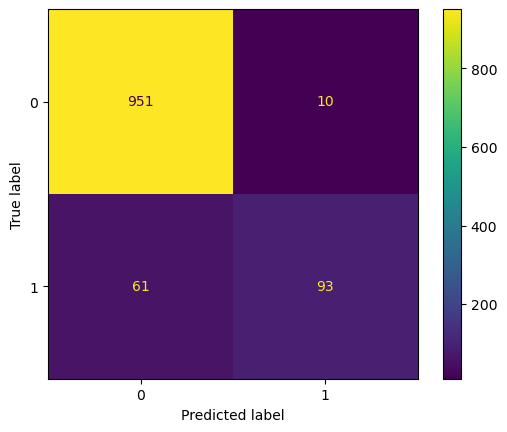

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__C': [0.1, 1, 10],
               'model__class_weight': [None, 'balanced']}
 ]

mp = model_pipe(LogisticRegression(solver='liblinear'), vectorizer)

bag_lr_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='f1', refit=True, cv=5)
bag_lr_results = bag_lr_results.fit(sX_train, sy_train)

ConfusionMatrixDisplay.from_estimator(bag_lr_results, sX_test, sy_test)
plt.show()

#### Support Vector Machine

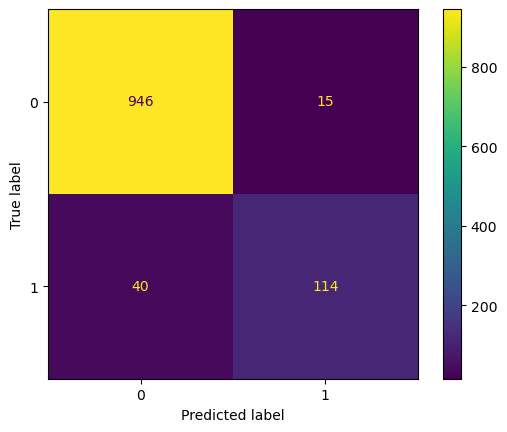

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__C': [0.1, 1, 10],
               'model__kernel': ['linear', 'rbf'],
               'model__class_weight': [None, 'balanced']}
 ]

mp = model_pipe(SVC(), vectorizer)

bag_svm_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='f1', refit=True, cv=5)
bag_svm_results = bag_svm_results.fit(sX_train, sy_train)

ConfusionMatrixDisplay.from_estimator(bag_svm_results, sX_test, sy_test)
plt.show()

In [28]:
bag_svm_results.best_estimator_

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=0.05)),
                ('model', SVC(C=10))])

#### KNN

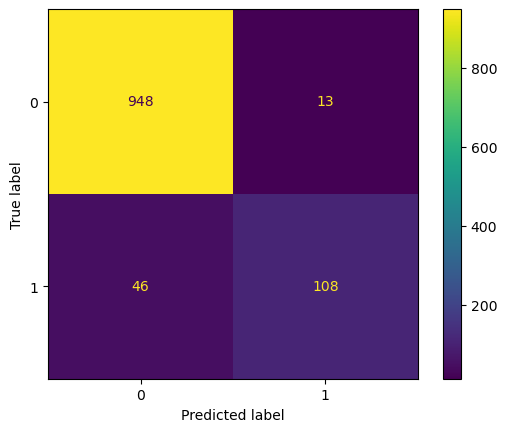

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__n_neighbors': [1, 4, 8, 10, 15],
               'model__weights': ['uniform','distance']}
 ]

mp = model_pipe(KNeighborsClassifier(), vectorizer)

bag_knn_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='f1', refit=True, cv=5)
bag_knn_results = bag_knn_results.fit(sX_train, sy_train)

ConfusionMatrixDisplay.from_estimator(bag_knn_results, sX_test, sy_test)
plt.show()

#### Naive Bayes

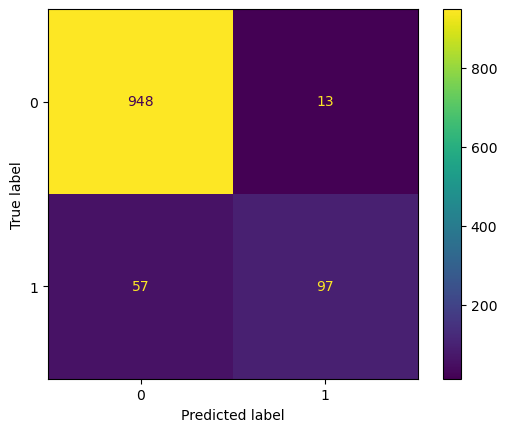

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10]}
 ]

mp = model_pipe(BernoulliNB(), vectorizer)

bag_nb_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='f1', refit=True, cv=5)
bag_nb_results = bag_nb_results.fit(sX_train, sy_train)

ConfusionMatrixDisplay.from_estimator(bag_nb_results, sX_test, sy_test)
plt.show()

In [31]:
lgs = bag_lr_results.score(sX_test, sy_test)
svs = bag_svm_results.score(sX_test, sy_test)
kns = bag_knn_results.score(sX_test, sy_test)
nbs = bag_nb_results.score(sX_test, sy_test)

print(f'Logistic Regression: {lgs:.2%}')
print(f'Support Vector Machine: {svs:.2%}')
print(f'k-Nearest Neighbors: {kns:.2%}')
print(f'Naive Bayes: {nbs:.2%}')

Logistic Regression: 72.37%
Support Vector Machine: 80.57%
k-Nearest Neighbors: 78.55%
Naive Bayes: 73.48%


> Need to try at least a couple classifiers on each problem. Remember, no free lunch.

If you had a specific performance threshold to hit, in this case it would be likely that you would need to pursue either additional feature processing and/or additional data collection.

## HR Employee Attrition
Can we predict who leaves the company?

In [32]:
hr = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/HR-Employee-Attrition.csv')

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

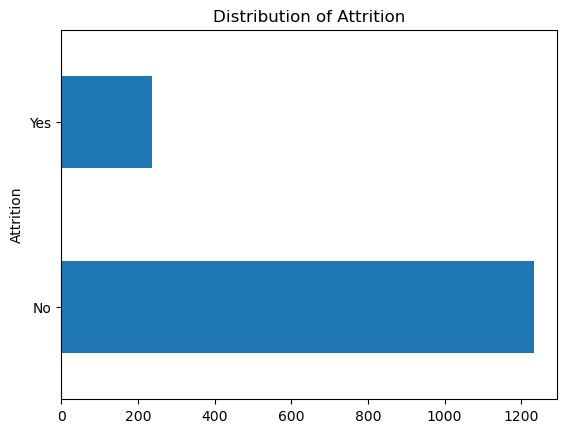

In [33]:
hr.Attrition.value_counts().plot.barh()
plt.title('Distribution of Attrition')
plt.show()

- Another unbalanced target variable, again this is very common.

#### Looks at the categorical variables

In [34]:
hr.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


#### Check Cardinality

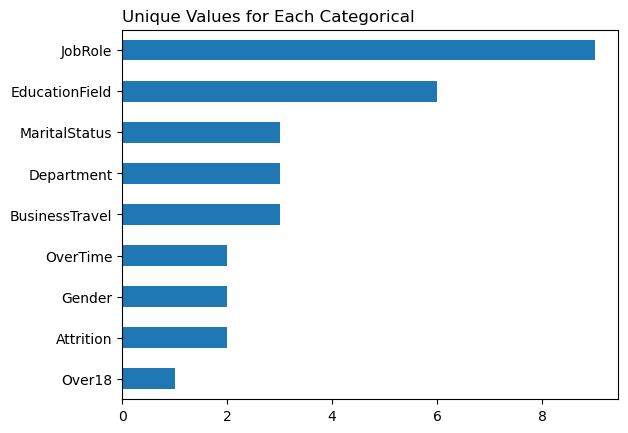

In [35]:
hr.select_dtypes('object').nunique().sort_values().plot.barh()
plt.title('Unique Values for Each Categorical', loc='left')
plt.show()

Observations:
- Over18 only has 1 unique value, so get rid of it.  
- Other columns seems to have a reasonable amount of unique variables for converting to dummy variables.

In [36]:
hr.select_dtypes('object').describe(include='all')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- Some of the other categoricals have fairly skewed distributions, so they may not be very useful in modeling.

#### Check numerical features

In [37]:
pd.set_option('display.max_columns', 100)
hr.select_dtypes('int64').describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Check histograms

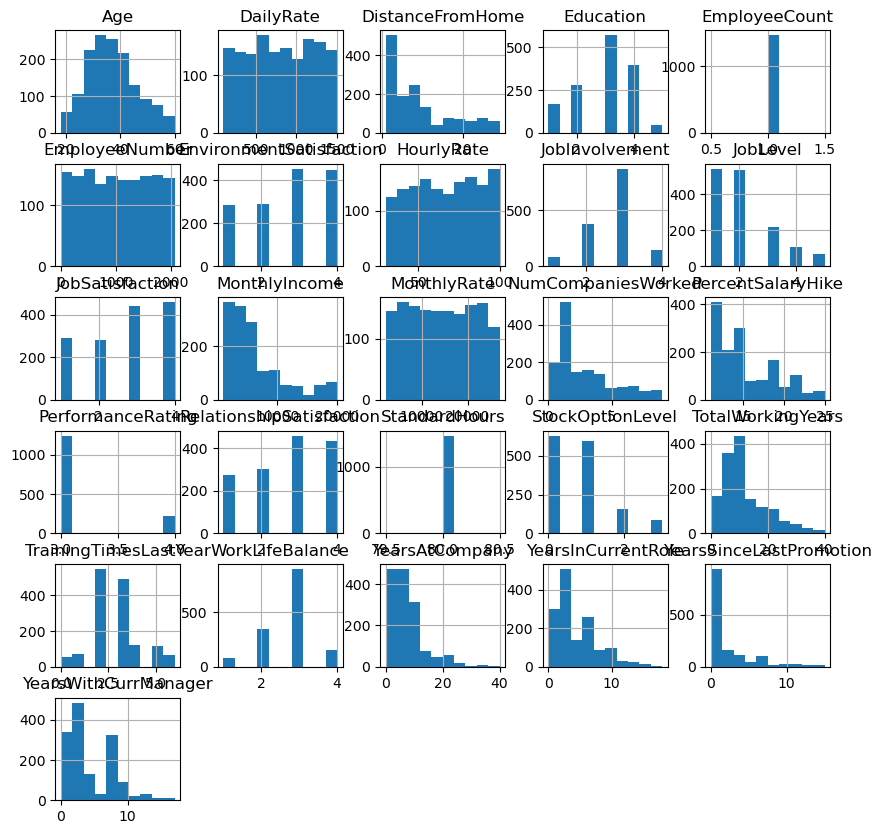

In [38]:
hr.select_dtypes('int64').hist(figsize=(10,10))
plt.show()

#### Confirm a few of the variables have low/no variance

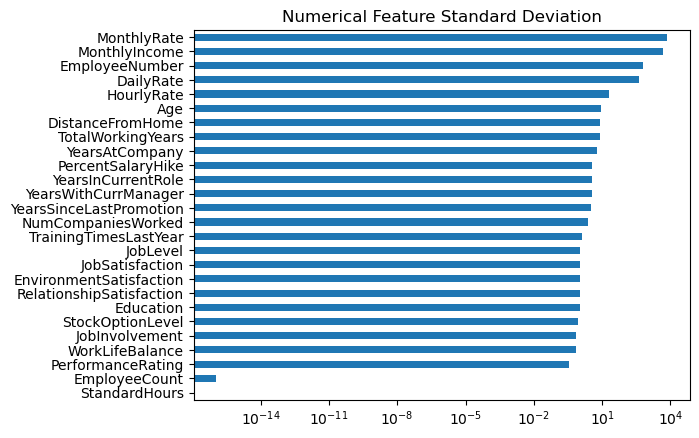

In [39]:
hr.select_dtypes('int64').std().sort_values().plot.barh()
plt.xscale('log')
plt.title('Numerical Feature Standard Deviation')
plt.show()

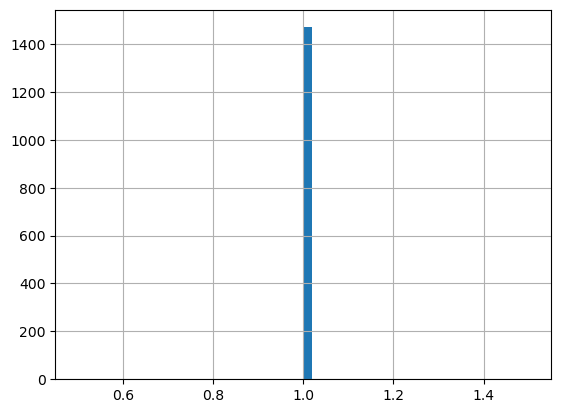

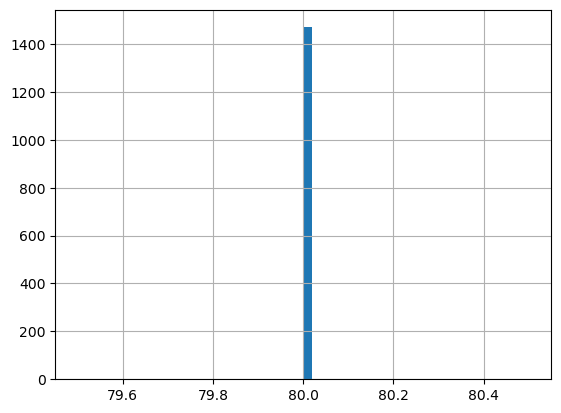

In [40]:
hr['EmployeeCount'].hist(bins=50)
plt.show()

hr['StandardHours'].hist(bins=50)
plt.show()

- Looks like EmployeeCount and StandardHours could be a limited use due to no/low variances.

#### Create a processing pipeline

In [41]:
nums = hr.dtypes[hr.dtypes == 'int64'].index.tolist()
nums = [x for x in nums if x not in ['EmployeeCount', 'StandardHours', 'EmployeeNumber']]

print('Numerical:\n')
print(*nums, sep='\n')

cats = hr.dtypes[hr.dtypes == 'object'].index.tolist()
cats = [x for x in cats if x not in ['Attrition', 'Over18']]

print('\nCategorical:\n')
print(*cats, sep='\n')

Numerical:

Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

Categorical:

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


#### Feature Processing Pipeline
We don't really need the imputer, but doesn't hurt to include it

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, nums),
                                                      ('create_dummies', cat_pipeline, cats)])

print('Pipeline Created')

Pipeline Created


#### Split the Data into Training and Test
Remember: no processing on the combined dataset, all the initial processing is on the training only to prevent leakage!

In [43]:
from sklearn.model_selection import train_test_split

y = np.where(hr['Attrition'] == 'Yes', 1, 0)

hX_train, hX_test, hy_train, hy_test = train_test_split(hr[nums+cats], 
                                                        y,
                                                        test_size=0.2
                                                       )

print(f'Training samples: {hX_train.shape[0]:,}')
print(f'Test samples: {hX_test.shape[0]:,}')

Training samples: 1,176
Test samples: 294


#### Model Helper

In [44]:
def results(model, params, feature_pipe, metric, x_train, y_train, x_test, y_test):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.pipeline import Pipeline
    import datetime
    
    s = datetime.datetime.now()
    pipe = Pipeline([
        ('processing', feature_pipe),
        ('model', model)
    ])
    
    gcv = GridSearchCV(estimator=pipe,
                       param_grid=params, 
                       cv=10, 
                       scoring=metric,
                       refit=True
                      )
    
    gcv = gcv.fit(x_train, y_train)
    
    print('Best model:\n')
    print(gcv.best_estimator_)
    
    print(f'\nValidation score: {gcv.best_score_:.2%}\n')
    
    preds = gcv.predict(x_test)
    print('\nResults:\n')
    print(classification_report(y_test, preds, target_names=['No','Yes'], zero_division=0))
    e = datetime.datetime.now()
    es = e-s
    
    print(f'Completed in {es}')
    
    return gcv

#### Metric Selection
- Recall is probably the most practically useful metric in this case.  
- If we have a high recall, we may be able to reach out to employees prior to the attrition event and proactively try to keep them from leaving and/or inform future hiring plans.

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

params = {'model__C': [0.01, 0.1, 1, 10, 100]}

logistic_model = results(model = LogisticRegression(class_weight='balanced', solver='liblinear'),
                        params = params,
                        feature_pipe = processing_pipeline,
                        metric = 'recall',
                        x_train = hX_train,
                        y_train = hy_train,
                        x_test = hX_test,
                        y_test = hy_test
                       )

Best model:

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                             

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

params = {'model__n_estimators': [100, 200], 'model__max_depth': [1, 10, 20]}

rf_model = results(model = RandomForestClassifier(),
        params = params,
        feature_pipe = processing_pipeline,
        metric = 'recall',
        x_train = hX_train,
        y_train = hy_train,
        x_test = hX_test,
        y_test = hy_test
       )

Best model:

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                             

#### SVM

In [47]:
from sklearn.svm import SVC

params = {'model__kernel': ['linear', 'rbf'], 'model__C': [0.01, 0.1, 1, 10]}

svm_model = results(model = SVC(class_weight='balanced'),
        params = params,
        feature_pipe = processing_pipeline,
        metric = 'recall',
        x_train = hX_train,
        y_train = hy_train,
        x_test = hX_test,
        y_test = hy_test
       )

Best model:

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                             

#### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

params = {'model__n_neighbors': [1, 2, 5, 10]}

svm_model = results(model = KNeighborsClassifier(),
        params = params,
        feature_pipe = processing_pipeline,
        metric = 'recall',
        x_train = hX_train,
        y_train = hy_train,
        x_test = hX_test,
        y_test = hy_test
       )

Best model:

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                             

> Looks like the logistic regression would be reasonable candidates to further explore tuning the parameters.


> Practical usage could be giving HR or departments list of individuals with high attrition probabilities so they could be proactively in their workforce planning.

# Summary

- Models are worthless without good data and features that can separate examples or explain variation.  
- Most models (properly tuned) will probably yield similar results.  
- Certain characteristics may sway you towards or away from certain types, e.g., KNN probably isn't a good choice if your dataset is massive and very sparse.  
- Unbalanced data is a bit more complicated and some models have options to handle it better than others.  

# Readings

- [Machine Learning with Python 3rd Edition, Chapter 3](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)  
- [Raschka's Naive Bayes Paper](https://arxiv.org/pdf/1410.5329.pdf)  
- [Hundred-Page Machine Learning Book, Chapter 3](http://bit.ly/theMLbook-Chapter-3)  
- [scikit-learn Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)